# Классификация типов медикаментов

Данные были получены от фармацевтической компании, которая собирала информацию о пациентах и типах медикаментов, которые в итоге использовались в качестве лечения. Наша задача состоит в том, чтобы на основе этих данных определить, какой тип медикамента подойдет для человека с определенным набором симптомов и характеристик.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1">EDA</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1">Описание данных</a></span><ul class="toc-item"><li><span><a href="#Названия-признаков-и-размер-датасета" data-toc-modified-id="Названия-признаков-и-размер-датасета-1.1.1">Названия признаков и размер датасета</a></span></li><li><span><a href="#Определение-признаков" data-toc-modified-id="Определение-признаков-1.1.2">Определение признаков</a></span></li><li><span><a href="#Основные-статистики" data-toc-modified-id="Основные-статистики-1.1.3">Основные статистики</a></span></li><li><span><a href="#Значения-категориальных-признаков" data-toc-modified-id="Значения-категориальных-признаков-1.1.4">Значения категориальных признаков</a></span></li><li><span><a href="#Распределения-вещественных-признаков" data-toc-modified-id="Распределения-вещественных-признаков-1.1.5">Распределения вещественных признаков</a></span></li><li><span><a href="#Целевая-переменная" data-toc-modified-id="Целевая-переменная-1.1.6">Целевая переменная</a></span></li></ul></li><li><span><a href="#Выявление-зависимостей" data-toc-modified-id="Выявление-зависимостей-1.2">Выявление зависимостей</a></span><ul class="toc-item"><li><span><a href="#Матрица-корреляций" data-toc-modified-id="Матрица-корреляций-1.2.1">Матрица корреляций</a></span></li><li><span><a href="#Зависимости-между-категориальными-признаками" data-toc-modified-id="Зависимости-между-категориальными-признаками-1.2.2">Зависимости между категориальными признаками</a></span></li><li><span><a href="#Проверка-зависимостей-между-категориальными-признаками-и-целевой-переменной" data-toc-modified-id="Проверка-зависимостей-между-категориальными-признаками-и-целевой-переменной-1.2.3">Проверка зависимостей между категориальными признаками и целевой переменной</a></span></li><li><span><a href="#Проверка-зависимостей-между-вещественными-признаками-и-целевой-переменной" data-toc-modified-id="Проверка-зависимостей-между-вещественными-признаками-и-целевой-переменной-1.2.4">Проверка зависимостей между вещественными признаками и целевой переменной</a></span></li><li><span><a href="#Возможные-выбросы" data-toc-modified-id="Возможные-выбросы-1.2.5">Возможные выбросы</a></span></li></ul></li><li><span><a href="#Основная-гипотеза" data-toc-modified-id="Основная-гипотеза-1.3">Основная гипотеза</a></span></li><li><span><a href="#Проверка-гипотезы" data-toc-modified-id="Проверка-гипотезы-1.4">Проверка гипотезы</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2">Подготовка данных</a></span></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-3">Моделирование</a></span><ul class="toc-item"><li><span><a href="#KNN" data-toc-modified-id="KNN-3.1">KNN</a></span><ul class="toc-item"><li><span><a href="#Предсказание" data-toc-modified-id="Предсказание-3.1.1">Предсказание</a></span></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-3.1.2">Подбор гиперпараметров</a></span></li><li><span><a href="#Итоговый-результат" data-toc-modified-id="Итоговый-результат-3.1.3">Итоговый результат</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.2">Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Предсказание" data-toc-modified-id="Предсказание-3.2.1">Предсказание</a></span></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-3.2.2">Подбор гиперпараметров</a></span></li><li><span><a href="#Итоговый-результат" data-toc-modified-id="Итоговый-результат-3.2.3">Итоговый результат</a></span></li><li><span><a href="#Интерпретация-модели" data-toc-modified-id="Интерпретация-модели-3.2.4">Интерпретация модели</a></span></li></ul></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.3">Decision Tree</a></span><ul class="toc-item"><li><span><a href="#Предсказание" data-toc-modified-id="Предсказание-3.3.1">Предсказание</a></span></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-3.3.2">Подбор гиперпараметров</a></span></li><li><span><a href="#Итоговый-результат" data-toc-modified-id="Итоговый-результат-3.3.3">Итоговый результат</a></span></li><li><span><a href="#Интерпретация-модели" data-toc-modified-id="Интерпретация-модели-3.3.4">Интерпретация модели</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.4">Выводы</a></span></li></ul></li></ul></div>

## EDA

### Описание данных

#### Названия признаков и размер датасета

In [3]:
data = pd.read_csv('drug200.csv')

In [4]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
data.shape

(200, 6)

Сократим названия типов медикаментов.

In [6]:
data['Drug'].replace({'DrugY':'Y', 'drugX':'X', 'drugA':'A', 'drugC':'C', 'drugB':'B'}, inplace = True)
classes = ['A', 'B', 'C', 'X', 'Y']

#### Определение признаков

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


**Начнем с определений каждого признака:**
- `Age` - возраст;
- `Sex` - пол;
- `BP` (Blood Pressure Level) - уровень артериального давления;
- `Cholesterol` - уровень холестерина;
- `Na_to_K` - отношение натрия к калию в организме;
- `Drug` - тип медикамента.

In [8]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

#### Основные статистики

In [9]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


#### Значения категориальных признаков

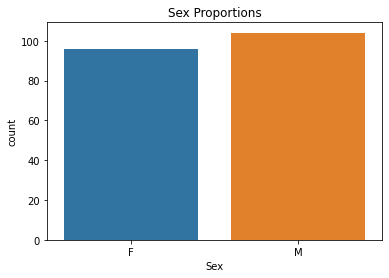

In [10]:
sns.countplot(x = data['Sex'])
plt.title('Sex Proportions')
plt.show()

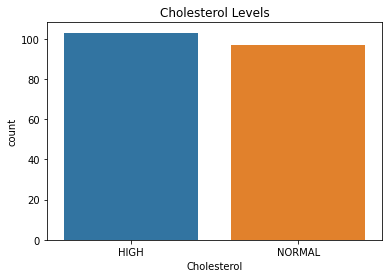

In [11]:
sns.countplot(x = data['Cholesterol'])
plt.title('Cholesterol Levels')
plt.show()

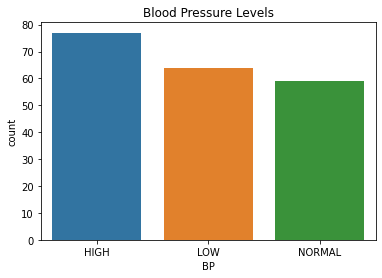

In [12]:
sns.countplot(x = data['BP'])
plt.title('Blood Pressure Levels')
plt.show()

#### Распределения вещественных признаков

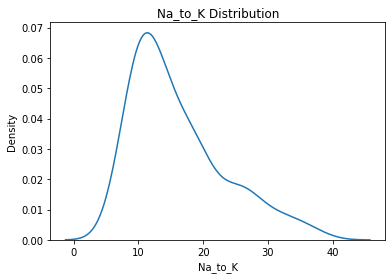

In [13]:
sns.kdeplot(x = data['Na_to_K'])
plt.title('Na_to_K Distribution')
plt.show()

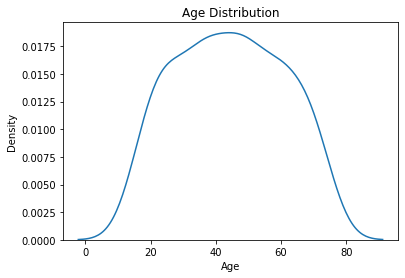

In [14]:
sns.kdeplot(x = data['Age'])
plt.title('Age Distribution')
plt.show()

#### Целевая переменная

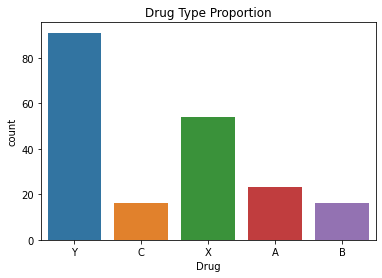

In [15]:
sns.countplot(x = data['Drug'])
plt.title('Drug Type Proportion')
plt.show()

**Выводы:**
- В данных нет пропусков;
- Распределение признака `Na_to_K` не похоже на нормальное. Медиана меньше среднего, о чем свидетельствует смещение кривой влево.
- Распределение возраста похоже на нормальное;
- Заметно преобладание класса Y, всего классов 5;
- Холестерин имеет два уникальных значения -- High и Normal, соотношение примерно одинаковое;
- Уровень артериального давления имеет 3 уникальных значения, наиболее часто встречающийся -- High;
- Признак `Sex` имеет два уникальных значения, соотношение мужчин (M) и женщин (F) примерно одинаковое.

### Выявление зависимостей

In [16]:
cat_features = data.select_dtypes('object').columns.tolist()
cat_features

['Sex', 'BP', 'Cholesterol', 'Drug']

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

copy = data.copy()
for f in cat_features:
    copy[f] = encoder.fit_transform(copy[f])

correlations = copy.corr()

#### Матрица корреляций

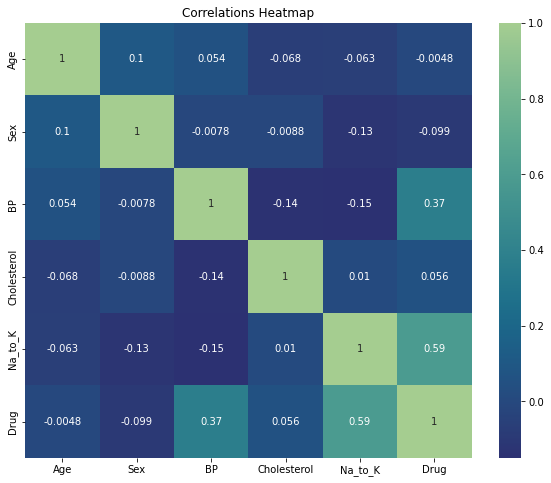

In [18]:
plt.figure(figsize = (10, 8))

sns.heatmap(correlations,  annot = True, cmap = 'crest_r')
plt.title('Correlations Heatmap')
plt.show()

Наблюдается сильная положительная корреляция между целевой переменной и признаком `Na_to_K`. Следовательно, чем выше соотношение натрия к калию в организме, тем больше (лексикографически) тип медикамента.

#### Зависимости между категориальными признаками

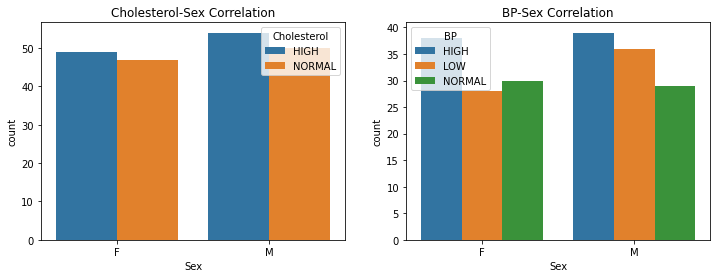

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))
sns.countplot(x = data['Sex'], hue = data['Cholesterol'], ax = axes[0])
sns.countplot(x = data['Sex'], hue = data['BP'], ax = axes[1])
axes[0].set_title('Cholesterol-Sex Correlation')
axes[1].set_title('BP-Sex Correlation')
plt.show()

Пол пациентов не связан с уровнем холестерина или артериального давления.

#### Проверка зависимостей между категориальными признаками и целевой переменной

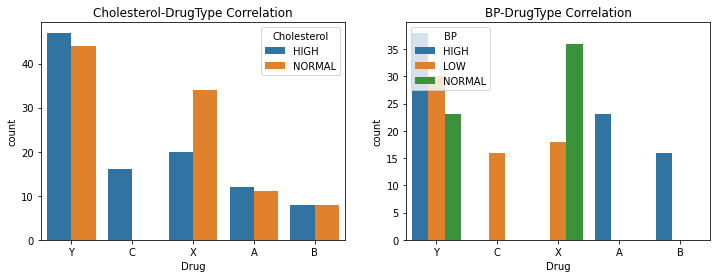

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))
sns.countplot(x = data['Drug'], hue = data['Cholesterol'], ax = axes[0])
sns.countplot(x = data['Drug'], hue = data['BP'], ax = axes[1])
axes[0].set_title('Cholesterol-DrugType Correlation')
axes[1].set_title('BP-DrugType Correlation')
plt.show()

Сразу можно предположить, что медикамент типа C принимают пациенты с высоким уровнем холестерина и низким артериальным давлением. Медикаменты типа A и B относятся к пациентам с высоким уровнем артериального давления.

#### Проверка зависимостей между вещественными признаками и целевой переменной

In [21]:
data.groupby('Drug').median()

,Age,Na_to_K
Drug,,
A,36.0,11.2270
B,60.0,11.1745
C,47.0,10.4905
X,45.0,10.5240
Y,42.0,20.4890


Высокое отношение натрия к калию у пациента относится к типу Y (что и было видно из матрицы корреляций), а большой возраст -- к типу B. Построим соответствующие графики.

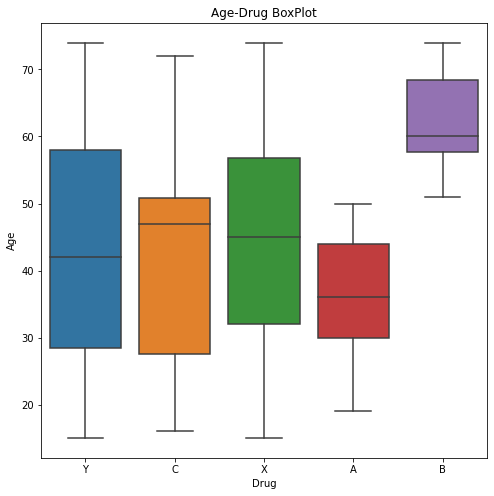

In [22]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = data['Drug'], y = data['Age'])
plt.title('Age-Drug BoxPlot')
plt.show()

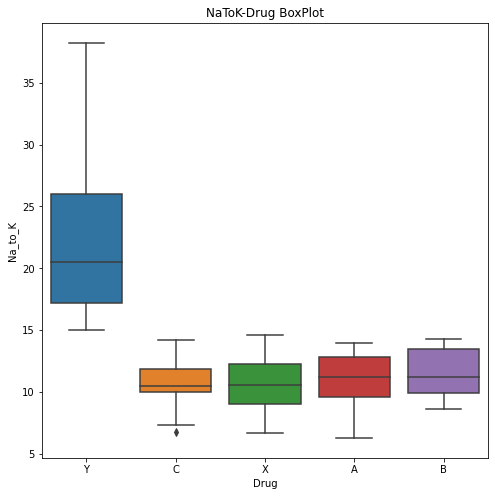

In [23]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = data['Drug'], y = data['Na_to_K'])
plt.title('NaToK-Drug BoxPlot')
plt.show()

#### Возможные выбросы

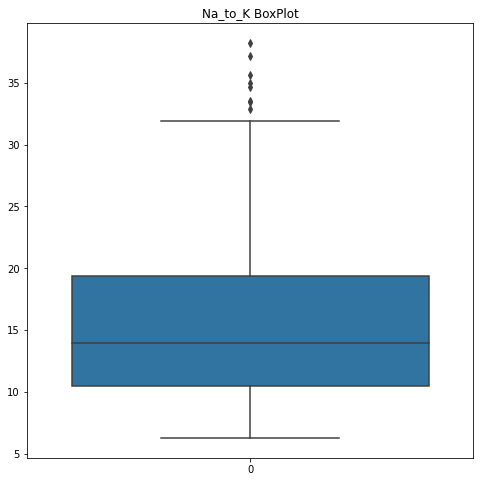

In [24]:
plt.figure(figsize = (8, 8))
sns.boxplot(data = data['Na_to_K'])
plt.title('Na_to_K BoxPlot')
plt.show()

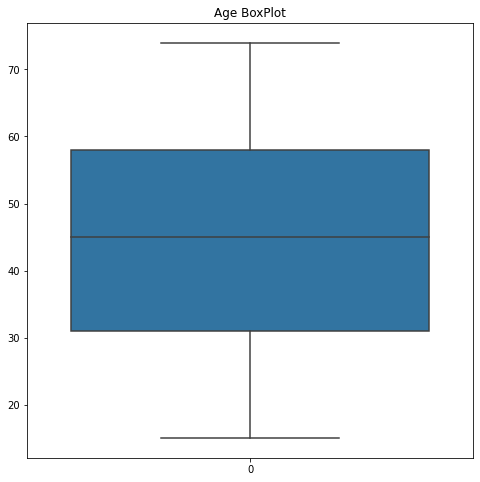

In [25]:
plt.figure(figsize = (8, 8))
sns.boxplot(data = data['Age'])
plt.title('Age BoxPlot')
plt.show()

In [26]:
data[['Age', 'Na_to_K']].quantile(0.97)

Age        72.03000
Na_to_K    33.48768
Name: 0.97, dtype: float64

In [27]:
data[['Age', 'Na_to_K']].quantile(0.03)

Age        16.97000
Na_to_K     7.33874
Name: 0.03, dtype: float64

**Выводы:** Предположительно, значения `Na_to_K` >= 32 -- выбросы;

### Основная гипотеза
- Медикамент типа Y принимают пациенты с отношением натрия к калию >= 15;
- Медикамент типа B принимают пациенты старше 50 лет с высоким уровнем артериального давления и отношением натрия к калию < 15;
- Медикамент типа A принимают пациенты младше 50 лет с высоким уровнем артериального давления и отношением натрия к калию < 15;
- Медикамент типа C принимают пациенты с высоким уровнем холестерина, низким артериальным давлением и отношением натрия к калию < 15;
- В остальных случаях пациент принимает медикамент типа Х.

### Проверка гипотезы

Установим уровень значимости в 0.05. Найдем $p$-значение для проверки значимости.

$$\chi^2 = \sum \frac{(o - e)^2}{e}$$

In [28]:
n = 60
sample = data.sample(n, random_state=42)

In [29]:
subsample = sample[data['Drug'] == 'Y']
print('o =', subsample[subsample['Na_to_K'] >= 15].shape[0])
print('e =', subsample.shape[0])

o = 26
e = 26


In [30]:
subsample = sample[sample['Drug'] == 'B']
print('o =', subsample[(subsample['Age'] >= 50) & 
                       (subsample['BP'] == 'HIGH') & 
                       (subsample['Na_to_K'] < 15)].shape[0])
print('e =', subsample.shape[0])

o = 3
e = 3


In [31]:
subsample = sample[sample['Drug'] == 'A']
print('o =', subsample[(subsample['Age'] < 50) & 
                       (subsample['BP'] == 'HIGH') & 
                       (subsample['Na_to_K'] < 15)].shape[0])
print('e =', subsample.shape[0])

o = 7
e = 7


In [32]:
n = 10
subsample = sample[sample['Drug'] == 'C']
print('o =', subsample[(subsample['Cholesterol'] == 'HIGH') & 
                       (subsample['BP'] == 'LOW') & 
                       (subsample['Na_to_K'] < 15)].shape[0])
print('e =', subsample.shape[0])

o = 6
e = 6


In [33]:
subsample = sample[sample['Drug'] == 'X']
print('o =', subsample.shape[0])
print('e =', 60 - 26 - 3 - 7 - 6)

o = 18
e = 18


![Chi Squared Distribution](img/ChiSquaredDistribution.png)

Имеем $\chi^2 = 0 + 0 + 0 + 0 + 0 = 0$ и одну степень свободы. Следовательно, $p_\rm{value} = 0.95 > 0.05$, значит гипотезу невозможно отклонить.

## Подготовка данных

In [34]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,Y
1,47,M,LOW,HIGH,13.093,C
2,47,M,LOW,HIGH,10.114,C
3,28,F,NORMAL,HIGH,7.798,X
4,61,F,LOW,HIGH,18.043,Y


In [35]:
data = data[data['Na_to_K'] <= 32]

In [36]:
encoder = LabelEncoder()
encoder.fit(data['Drug'])
data['Drug'] = encoder.transform(data['Drug'])
y = np.array(data['Drug'])
X = data.drop(['Drug', 'Sex'], axis = 1)
X = pd.get_dummies(X)

In [37]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,4
1,47,M,LOW,HIGH,13.093,2
2,47,M,LOW,HIGH,10.114,2
3,28,F,NORMAL,HIGH,7.798,3
4,61,F,LOW,HIGH,18.043,4


In [38]:
X.head()

,Age,Na_to_K,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,0,1,0
1,47,13.093,0,1,0,1,0
2,47,10.114,0,1,0,1,0
3,28,7.798,0,0,1,1,0
4,61,18.043,0,1,0,1,0


In [39]:
features = X.columns.tolist()
features

['Age',
 'Na_to_K',
 'BP_HIGH',
 'BP_LOW',
 'BP_NORMAL',
 'Cholesterol_HIGH',
 'Cholesterol_NORMAL']

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.66, random_state = 42)

## Моделирование

Для оценки качества предсказаний будем использовать макро-усреднение f1-меры, т.к. нам не очень важно преобладание одного класса над другими, и в то же время одинаково важна и точность, и полнота.

### KNN

#### Предсказание

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

simple_knn = KNeighborsClassifier()
simple_knn.fit(X_train_scaled, y_train)
y_pred = simple_knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73        14
           1       0.45      1.00      0.62         5
           2       1.00      1.00      1.00         2
           3       0.96      1.00      0.98        22
           4       0.86      0.83      0.84        23

    accuracy                           0.85        66
   macro avg       0.85      0.88      0.83        66
weighted avg       0.90      0.85      0.85        66



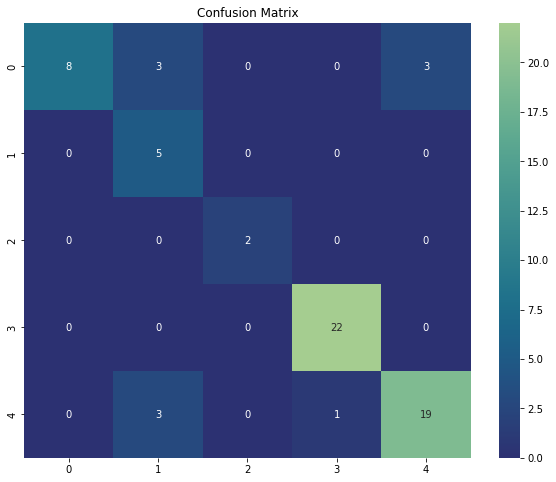

In [43]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 8))
sns.heatmap(matrix,  annot = True, cmap = 'crest_r')
plt.title('Confusion Matrix')
plt.show()

#### Подбор гиперпараметров

In [44]:
knn = KNeighborsClassifier()

parameters = {
    'n_neighbors': list(range(1, 30)),
    'metric': ['minkowski', 'euclidean', 'cosine']
}

grid_search = GridSearchCV(knn, parameters, cv = 5, n_jobs = -1)
grid_search.fit(X_train_scaled, y_train)
print('Best parameters:', grid_search.best_params_)

Best parameters: {'metric': 'cosine', 'n_neighbors': 1}


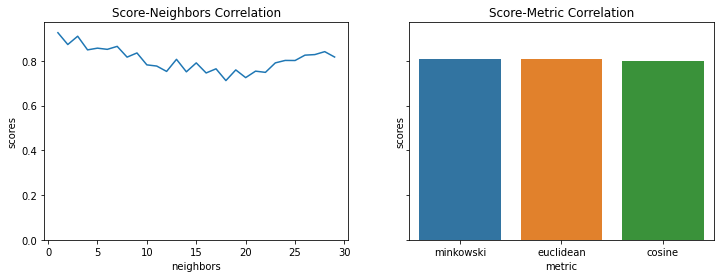

In [45]:
scores = grid_search.cv_results_['mean_test_score']
neighbors = grid_search.cv_results_['param_n_neighbors'].tolist()
metric = grid_search.cv_results_['param_metric'].tolist()

result = pd.DataFrame({'neighbors': neighbors, 'metric': metric, 'scores': scores})

fig, axes = plt.subplots(1, 2, figsize = (12, 4), sharey = True)
sns.lineplot(x = result['neighbors'], y = result['scores'], ci = None, ax = axes[0])
sns.barplot(x = result['metric'], y = result['scores'], ci = None, ax = axes[1])
axes[0].set_title('Score-Neighbors Correlation')
axes[1].set_title('Score-Metric Correlation')
plt.show()

In [46]:
print('Mean CV score:', grid_search.cv_results_['mean_test_score'].mean())

Mean CV score: 0.8053262599469496


#### Итоговый результат

In [47]:
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)
y_pred = best_knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.56      1.00      0.71         5
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        22
           4       1.00      0.96      0.98        23

    accuracy                           0.94        66
   macro avg       0.91      0.95      0.91        66
weighted avg       0.97      0.94      0.95        66



### Logistic Regression

#### Предсказание

In [48]:
from sklearn.linear_model import LogisticRegression

simple_logreg = LogisticRegression()
simple_logreg.fit(X_train, y_train)
y_pred = simple_logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.62      1.00      0.77         5
           2       1.00      1.00      1.00         2
           3       1.00      0.91      0.95        22
           4       0.88      1.00      0.94        23

    accuracy                           0.91        66
   macro avg       0.90      0.92      0.90        66
weighted avg       0.93      0.91      0.91        66



In [49]:
print('Number of iterations:', simple_logreg.n_iter_)

Number of iterations: [100]


#### Подбор гиперпараметров

Будем использовать `l1`-регуляризацию, т.к. нам нужно отобрать только наиболее значимые признаки. В дальнейшем это упростит интерпретацию.

In [50]:
logreg = LogisticRegression(max_iter = 10000, penalty='l1', solver='liblinear')

parameters = {
    'C': [1, 10, 100, 1000, 10000]
}

grid_search = GridSearchCV(logreg, parameters, cv = 5, n_jobs = -1)
grid_search.fit(X_train, y_train)
print('Best parameters:', grid_search.best_params_)

Best parameters: {'C': 10}


In [51]:
print('Mean CV score:', grid_search.cv_results_['mean_test_score'].mean())

Mean CV score: 0.9488615384615384


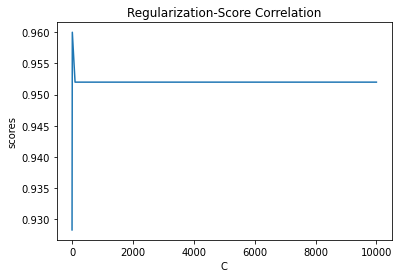

In [52]:
scores = grid_search.cv_results_['mean_test_score']
C = grid_search.cv_results_['param_C'].tolist()

result = pd.DataFrame({'C': C, 'scores': scores})

sns.lineplot(x = result['C'], y = result['scores'], ci = None)
plt.title('Regularization-Score Correlation')
plt.show()

#### Итоговый результат

In [53]:
best_logreg = grid_search.best_estimator_
best_logreg.fit(X_train, y_train)
y_pred = best_logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00         2
           3       0.96      1.00      0.98        22
           4       1.00      0.96      0.98        23

    accuracy                           0.95        66
   macro avg       0.93      0.96      0.94        66
weighted avg       0.96      0.95      0.96        66



#### Интерпретация модели

In [54]:
coef = best_logreg.coef_.T

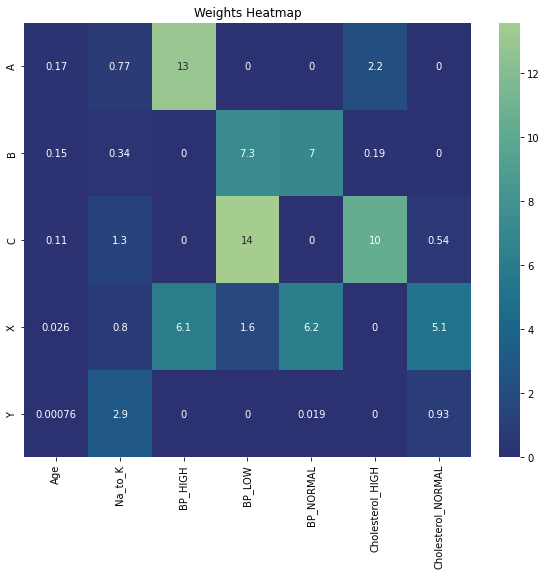

In [55]:
r = pd.DataFrame()

for i in range(len(features)):
    r[features[i]] = np.abs(coef[i])
r = r.rename({0: 'A', 1: 'B', 2: 'C', 3: 'X', 4: 'Y'})

plt.figure(figsize = (10, 8))
sns.heatmap(r,  annot = True, cmap = 'crest_r')
plt.title('Weights Heatmap')
plt.show()

### Decision Tree

#### Предсказание

In [56]:
from sklearn.tree import DecisionTreeClassifier

simple_tree = DecisionTreeClassifier()
simple_tree.fit(X_train, y_train)
y_pred = simple_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        23

    accuracy                           0.98        66
   macro avg       0.99      0.96      0.97        66
weighted avg       0.99      0.98      0.98        66



#### Подбор гиперпараметров

In [57]:
tree = DecisionTreeClassifier()

parameters = {
    'max_depth': list(range(1, 10)),
    'min_samples_leaf': list(range(1, 10))
}

grid_search = GridSearchCV(tree, parameters, cv = 5, n_jobs = -1)
grid_search.fit(X_train, y_train)
print('Best parameters:', grid_search.best_params_)

Best parameters: {'max_depth': 4, 'min_samples_leaf': 1}


In [58]:
print('Mean CV score:', grid_search.cv_results_['mean_test_score'].mean())

Mean CV score: 0.9105982905982906


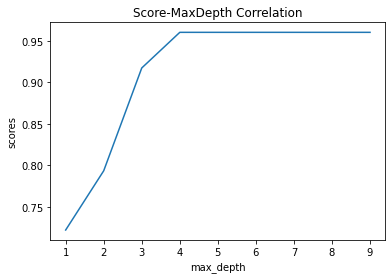

In [59]:
scores = grid_search.cv_results_['mean_test_score']
max_depth = grid_search.cv_results_['param_max_depth'].tolist()

result = pd.DataFrame(
    {
    'max_depth': max_depth, 
    'scores': scores
    }
)

sns.lineplot(x = result['max_depth'], y = result['scores'], ci = None)
plt.title('Score-MaxDepth Correlation')
plt.show()

#### Итоговый результат

In [60]:
best_tree = grid_search.best_estimator_
best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        23

    accuracy                           0.98        66
   macro avg       0.99      0.96      0.97        66
weighted avg       0.99      0.98      0.98        66



#### Интерпретация модели

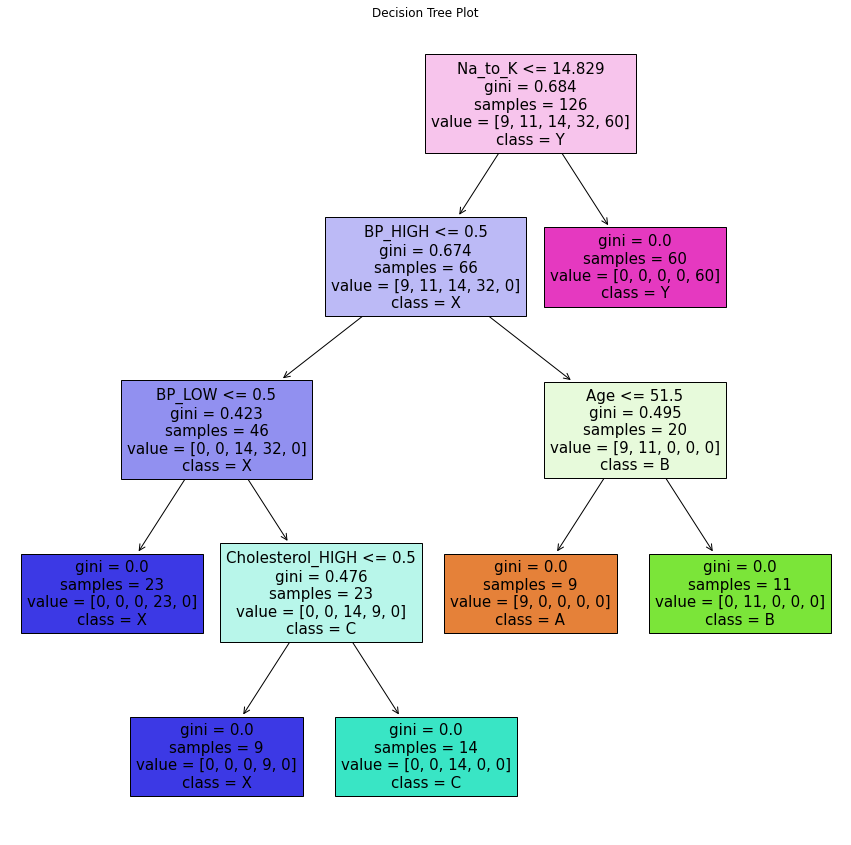

In [61]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize = (15, 15))
plot_tree(best_tree, feature_names = features, class_names = classes, filled = True)
plt.title('Decision Tree Plot')
plt.show()

### Выводы

Метод KNN с использованием нормализации дал вполне неплохие результаты на тестовой выборке, но не очень хорошие на кросс-валидации. Наилучшее качество было получено при использовании логистической регрессии и дерева решений. Они показали примерно одинаковые результаты на кросс-валидации и на тестовой выборке. Для предсказаний на этих данных лично я бы использовал дерево решений, т.к. оно дало более высокие показатели  по макроусреднению F1-меры. Также дерево практически идеально выбрало предикаты, которые подтвердили раннее выдвинутую гипотезу, что говорит о хорошей интерпретируемости.